 # Classification Task:
 Implement the following algorithms manually, without relying on libraries like scikit-learn.
After implementation, compare the performance of these classifiers.

In [229]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random as rd
import math as m
import collections
from time import sleep
from tqdm import tqdm, trange
from sklearn.metrics import accuracy_score
import time
import random as rd

### EDA
該數據集包含有關保單持有人的信息，例如保單持有時間、汽車年齡、汽車擁有者年齡、城市人口密度、汽車的製造和型號、功率、引擎類型等，以及目標變量，指出汽車保單持有人是否在接下來的6個月內會提出索賠。

1. 利用pandas輸入csv檔案並且建立成data frame格式，並且查看前五筆資料形式

In [230]:
train_csv = pd.read_csv("/Users/zhuxinrong/Desktop/ML/Dataset/train.csv")
train_csv.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


2. 查看數值型資料的敘述統計結果(可以得知資料總筆數為58592筆)

In [231]:
train_csv.describe() # include="all" 則可以看到每一筆資料包含非數值行資料的敘述統計結果

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


3. 將資料進行標準化（針對需要進行標準化的特徵進行）

In [232]:
def standardize(data,column):
    # 選擇需要標準化的特定行
    col_data = data[column].values.reshape(1, -1)
    # 使用 fit_transform 函數對特定行進行標準化
    normalized_col_data = (col_data - col_data.mean()) / (col_data.std())
    # 更新 DataFrame 中特定行的標準化後數值
    data[column] = normalized_col_data.flatten()
    return data

standardize(train_csv, "population_density")
standardize(train_csv, "displacement")
standardize(train_csv, "length")
standardize(train_csv, "width")
standardize(train_csv, "height")
standardize(train_csv, "gross_weight")

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,-0.783513,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,0.462975,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,-0.835268,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,0.158275,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,0.900969,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,-0.568111,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,-0.625076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,0.900969,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,-0.568111,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


4. 將資料判斷是否為類別變數，如果是的話則進行one-hot encoding

In [233]:
# 假設輸入的特徵為6個，並且有2個是類別變數
train = train_csv.drop(["policy_id","is_claim"], axis=1)
# train = train_csv.iloc[:,:-1]
# , "max_torque", "make", "fuel_type"
# 取出正確的label
label = train_csv["is_claim"].values
# 選取出特徵後將資料型態轉變成lsit # 也可以轉換成matrix to_numpy()
subset_ = train.values
for col in train.columns:
    if train[col].isin(['Yes', 'No']).all():
        train[col] = train[col].map({'Yes': 1, 'No': 0})
    elif train[col].apply(lambda x: isinstance(x, str)).all():
        index = train.columns.get_loc(col)
        onehot = pd.get_dummies(train[col], columns=['Category'], prefix='Category', dtype=int)
        train = pd.concat([train, onehot], axis=1)

index=[]
for col in train.columns:
    if train[col].apply(lambda x: isinstance(x, str)).all():
        index.append(train.columns.get_loc(col))
train = train.drop(columns=train.columns[index]) # 刪掉那些已經經過one-hot encoding的行資料
train_ = train
ori_X_train, ori_X_test, ori_y_train, ori_y_test = train_test_split(train_, train_csv["is_claim"], test_size=0.2, random_state=42)

train_column_names = train.columns # 儲存變數名稱
train.describe()


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,Category_K Series Dual jet,Category_K10C,Category_i-DTEC,Category_Disc,Category_Drum,Category_Automatic,Category_Manual,Category_Electric,Category_Manual,Category_Power
count,58592.000000,58592.000000,58592.000000,5.859200e+04,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,...,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,5.220656e-17,1.763722,3.137066,0.314053,0.606329,0.239248,0.959500,...,0.235117,0.071221,0.036080,0.239248,0.760752,0.348358,0.651642,0.407581,0.020634,0.571785
std,0.414156,0.056721,0.122886,1.000009e+00,1.136988,1.832641,0.464142,0.488568,0.426628,0.197131,...,0.424076,0.257196,0.186491,0.426628,0.426628,0.476454,0.476454,0.491389,0.142158,0.494824
min,0.002735,0.000000,0.288462,-1.049651e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,-7.199797e-01,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,-5.681113e-01,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.039104,0.110000,0.548077,4.629745e-01,3.000000,6.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.396641,1.000000,1.000000,3.091906e+00,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


5. 將one-hot encoding結束後資料型態由dataframe轉換成np.array形式，並且切分成80%訓練及資料與20%測驗資料

In [234]:
# 將資料型態由dataframe轉換成np.array
train = train.values

# 隨機打亂資料的index
indices = np.arange(len(train))
np.random.shuffle(indices)

# 使用打亂後的index，將資料切分成 80% train 和 20% test
split_ratio = 0.8
split_index = int(len(train) * split_ratio)
X_shuffled = train[indices]
y_shuffled = label[indices]
train = X_shuffled[:split_index]
train_label = y_shuffled[:split_index]
test = X_shuffled[split_index:]
test_label = y_shuffled[split_index:]

### 1. Linear Classifier :
• Implement a basic linear classifier.

In [168]:
# # 利用內建套件的輸入csv檔案
# import csv
# # train csv 檔案輸入
# with open("/Users/zhuxinrong/Desktop/ML/Dataset/train.csv", newline="") as train_csv:
#     data = csv.reader(train_csv)
#     data_list = list(data) # 將資料轉換成list串列形式
#     train_csv.close() # 在城市中開啟了檔案以後如果要停止對檔案的更動或寫入，可以將檔案關閉

# print(data_list[1][0]) # 取得資料中第2個row中第1個column的數值
# print(data_list[0]) # 取得各項變數名稱
# print(type(data_list)) # 查看資料型態為list 

# print((train_csv.head(5)))
# train_csv["age_of_car"] # 取得單一特定欄位資料
# print(train_csv.at[1,"age_of_car"])# 取得特定欄位的索引值為1資料
# print(train_csv.iat[1,2]) # 利用欄位順序與資料索引值取得資料
# print(train_csv.loc[[1,3],["age_of_car","make"]])# 取得資料索引值1,3的兩個特定欄位資料
# print(train_csv.head(3)) # 顯示前3筆資料
# print(len(train_csv)) # 顯示資料總筆數
# train_csv.describe() # 檢查資料統計數字
# print(train_csv.isnull()) # 檢查資料中是否有遺失值
# print(train_csv.isna()) # 檢查資料中是否有NA值
# train_csv.iloc[:,:-1]

# # 假設輸入的特徵為6個，並且有2個是類別變數
# train = train_csv[["policy_tenure", "age_of_car","area_cluster", "age_of_policyholder", 
#                     "population_density", "max_torque", "make", "fuel_type"]]
# # , "max_torque", "make", "fuel_type"
# # 取出正確的label
# label = train_csv["is_claim"].values
# # 選取出特徵後將資料型態轉變成lsit # 也可以轉換成matrix to_numpy()
# subset_ = train.values

# # 判斷變數是否為字串或是數值
# str_index = []
# for l in range(subset_.shape[1]):
#     if isinstance(subset_[0,l], str):
#         str_index.append(l)
# # 從原本訓練資料中刪除屬於字串類型資料
# subset = np.delete(subset_, str_index, 1)
# # 如果特徵為字串，則進行One Hot encoding
# for s in range(len(str_index)):
#     categories = subset_[:,str_index[s]] # 引入資料中的類別特徵
#     unique_categories = np.unique(categories) # 獲得該類別資料中的不同特徵（共有幾種類別）
#     one_hot_encoded = np.zeros((len(categories), len(unique_categories))) # 建立一個空的矩陣用於儲存One-Hot Encoding的結果
#     # 進行One-Hot Encoding
#     for i in range(len(categories)):
#         category_index = np.where(unique_categories == categories[i])[0][0] # 判斷第i列的類別資料屬於哪一個類別，例如第一列資料屬於第五個類別，後面兩個[0]為了使回傳是一個數字而非list或arrary
#         one_hot_encoded[i, category_index] = 1 # 設定全部種類中，屬於第幾種類別就該位置變成一，其他維持為0
#     subset = np.concatenate([subset, one_hot_encoded],axis=1) # 把One-Hot Encoding加入訓練資料中

# # 隨機打亂資料的index
# indices = np.arange(len(subset))
# np.random.shuffle(indices)

# # 使用打亂後的index，將資料切分成 80% train 和 20% test
# split_ratio = 0.8
# split_index = int(len(subset) * split_ratio)
# X_shuffled = subset[indices]
# y_shuffled = label[indices]
# train = X_shuffled[:split_index]
# train_label = y_shuffled[:split_index]
# test = X_shuffled[split_index:]
# test_label = y_shuffled[split_index:]

In [236]:
class LinearClassifier:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate # 設定學習率（讓更新的權重不要一次更新太多）

    def fit(self, X, y): # X:train data, y: train label, coef代表如果已經有初始權重輸入則在此輸入並且不需要初始化權重
        self.weights = np.random.randn(X.shape[1]) # 首先隨機生成初始化權重，根據輸入特徵數量也就是欄位數生成
        self.bias = 0 # 設定初始化偏移量b

        for i in tqdm(range(X.shape[0])): # 輸入第i筆資料進行動作
            y_pred = self.predict(X[i]) # 輸入特徵並計算出prediction值（0,1）
            loss =  ( y[i] - y_pred )  # 判斷是否需要對於權重進行更新（Loss: true label - prediction label）如果0-1=-1代表真實為負但是預測是正的，因此權重應該要下降（向負的靠近）
            loss_feature = [i * loss for i in X[i]] # 計算error * feature 判斷需不需要更新權重   變數裡面外面不要重複i,j
            add = lambda x, y: x + self.learning_rate * y # 需要設定learning rate
            self.weights = list(map(add, self.weights, loss_feature)) # 如果預測正確就不需要更新權重，也就是Loss=0，update=0
            self.bias += self.learning_rate * loss
    
    def predict(self, x):
        activation = np.dot(self.weights, x) + self.bias # 計算predict
        return 1 if activation >= 0 else 0 # 根據predict正負判斷回傳label為1或是0

rd.seed(10)
# 初始化一個線性分類器（並設定learning rate）
linearclass = LinearClassifier(learning_rate=1e-4)

# 輸入訓練資料進行訓練
linearclass.fit(train, train_label)

# 利用切好的test資料進行預測
predictions = [linearclass.predict(x) for x in test]

print(f"accuracy percentage:{round(accuracy_score(predictions, test_label) * 100, 4)}%")
print(collections.Counter(test_label))
print(collections.Counter(predictions))
print(collections.Counter(train_label)) # 大部分是0

100%|██████████| 46873/46873 [00:01<00:00, 36043.37it/s]


accuracy percentage:88.0451%
Counter({0: 10975, 1: 744})
Counter({0: 10978, 1: 741})
Counter({0: 43869, 1: 3004})


### 2. K-NN Classifier :
• Implement the K-NN classifier using three different distance metrics.\
• Specify and explain the distance metrics used.

In [154]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, mode = 1):
        y_pred = []
        for x in tqdm(X, desc="Processing List", unit="x"):
            y_pred.append(self._predict(x, mode))
        return np.array(y_pred)

    def _predict(self, x, mode):
        x = np.tile(x, (self.X_train.shape[0], 1)) # 將輸入進來單一筆的test資料變成和訓練資料同維度的矩陣以方便直接做矩陣相減運算
        # 計算test資料與所有train資料的距離(利用明氏距離Minkowski Distance , mode=1代表利用曼哈頓距離, mode=2代表利用歐式距離, mode>2代表利用明氏距離)
        distances = (np.sum(np.abs(x - self.X_train) ** mode , axis=1)) ** (1/mode)  # default為歐幾里得距離（利用明式距離P=1）
        distances = distances.tolist()  # 轉成list

        # 找到離該測驗樣本最近的k個訓練樣本index
        k_indices = np.argsort(distances)[:self.k] # argsort是將元素"從小到大"排序後將其index取出，因此取出前面k個元素（[0:3]代表前面0,1,2個）也就是距離最小的k個
        
        # 獲取這k個最近距離資料的label
        k_nearest_labels = self.y_train[k_indices].tolist()
        
        # 對這k個最近距離資料進行投票確定測驗資料屬於哪個類別
        most_common = np.bincount(k_nearest_labels) # 將label排出順序大小後回傳出現次數（例如[0,5,3,2,3,1,4,2,4]回傳[1,1,2,2,2,1]）
        return most_common.argmax() # 最後回傳的會是該測驗資料的最終決定分類，因此回傳最近資料中出現最多次的label


# 初始設定一個k=3的KNN分類器
knn = KNNClassifier(k=3)

# 輸入訓練資料訓練該KNN模型
knn.fit(train[0:25000], train_label[0:25000])

# 對於測驗資料進行預測
predictions = knn.predict(test, mode = 2)

print(f"accuracy percentage:{round(accuracy_score(predictions, test_label) * 100, 4)}%")

Processing List: 100%|██████████| 11719/11719 [02:19<00:00, 84.00x/s]

accuracy percentage:92.6103%


### 3. Naïve Decision Tree Classifier :
• Implement a basic decision tree classifier.\
• Note: This is a naïve implementation without any pruning.

### 4. Decision Tree with Pruning :
• Implement a decision tree classifier that incorporates a pruning algorithm.\
• Clearly explain the type of pruning algorithm and criterion used to prune nodes in
the decision tree.

In [258]:
# 首先定義節點
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=None, mode="gini"): # 最少要有兩筆資料，才可以分群，以及最多設定兩個節點 >>>>> 結束條件，令普通設定是沒有要預剪枝的，因此深度設定是沒有（會drop掉feature）

        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth 

        # mode判斷計算熵方式
        self.mode = mode
        
    def build_tree(self, dataset, curr_depth=0):

        X, Y = dataset[:,:-1], dataset[:,-1] # X:內建假設最後一行資料為label因此刪除最後一行當成訓練資料, Y: 擷取資料最後一行的label
        num_samples, num_features = np.shape(X) # 回傳樣本數，即所有資料數量並且回傳特徵數（列、行）
        all_rows_same = np.all(X == X[0, :], axis=1) # 剩下的資料全部都一樣會導致分不了出現錯誤，因此需要多判斷

        # split until stopping conditions are met
        if self.max_depth is None:  # 如果不需要剪枝就會進來這裡
            if num_samples>=self.min_samples_split and X.size > 0 and not all_rows_same.all(): # 如果現在樣本數大於2並且節點（深度）小於兩層/個則可以進行split "並且判斷如果現在已經沒有特徵可以分類就會跳出並結束分類（沒有預剪枝情況下）"
                # find the best split
                best_split = self.get_best_split(dataset, num_samples, num_features)
                # check if information gain is positive
                if best_split["info_gain"]>0:
                    # recur left
                    left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)  # 根據分類點分成左右兩部分資料後，左右兩部分資料再根據之前步驟去分下去（並且數的深度加一代表已存在幾個節點）
                    # recur right
                    right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                    # return decision node
                    return Node(best_split["feature_index"], best_split["threshold"], 
                                left_subtree, right_subtree, best_split["info_gain"])
        else: # 如果有需要預先剪枝就會進來這裡，判斷現在深度是否有到達設定深度之前，只要資料量大於兩筆就會進行細分
            if num_samples>=self.min_samples_split and curr_depth<=self.max_depth and not all_rows_same.all(): # 如果現在樣本數大於2並且節點（深度）小於兩層/個則可以進行split (有預剪枝情況下）
                # find the best split
                best_split = self.get_best_split(dataset, num_samples, num_features)
                # check if information gain is positive
                if best_split["info_gain"]>0:
                    # recur left
                    left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)  # 根據分類點分成左右兩部分資料後，左右兩部分資料再根據之前步驟去分下去（並且數的深度加一代表已存在幾個節點）
                    # recur right
                    right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                    # return decision node
                    return Node(best_split["feature_index"], best_split["threshold"], 
                                left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features): # 找到最佳的資料分割點
        ''' function to find the best split '''
    # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf") # -Inf代表負無限
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)  # 將該特徵資料內容有出現的元素集合起來（可能之後分類的點）
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                # 根據定義的split函數，將資料根據不同特徵內出現過的某個數值/類別分割成兩個資料
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold) 
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1] # 將分成兩部分資料的 label與全部的label擷取出來
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y) # 首先判斷分成兩部分的資料長度（不可以為零），之後去判斷兩部分資料的訊息量
                    # update the best split if needed
                    if curr_info_gain>max_info_gain : #如果現在特徵分類的比較2好，代表訊息量會較高，因此如果訊息量較之前分類的高，則我們更新分類的節點
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
        
        if self.max_depth is None: # 如果沒有設定要預剪枝，則需要drop feature避免不會停止
            # drop best feature(避免重複判斷最佳的特徵導致不會停止)(如果不設定預剪枝)
            best_split["dataset_right"] = np.delete(best_split["dataset_right"], best_split["feature_index"], axis=1)
            best_split["dataset_left"] = np.delete(best_split["dataset_left"], best_split["feature_index"], axis=1)
            

        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold): # 將資料以設定的特定特徵的某筆資料，將資料分成大於該筆資料數值的部分和小於該筆資料數值的部分
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child): # 計算該分類節點與標準的訊息純度，利用熵與吉尼布純度兩種方法計算判斷（default 為利用熵計算判斷）
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if self.mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child)) # 根據gini計算information gain
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child)) # 根據熵計算information gain
        return gain
    
    def entropy(self, y): # 計算分類節點的熵
        ''' function to compute entropy '''
    
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y) # 計算出分類後的機率值
            entropy += -p_cls * np.log2(p_cls) # 熵的計算公式
        return entropy 
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y) # 計算出分類後的機率值
            gini += p_cls**2 # gini的計算公式
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1) # 把訓練資料的特徵與label合併起來，注意label資料需變成樣本數x1的陣列:[[0],[1],[0]...]
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


#### Naïve Decision Tree Classifier :

In [259]:
# train = train[:500]
# train_label = train_label[:500].reshape(-1,1)
# test = test[500:700]
# test_label = test_label[500:700].reshape(-1,1)

# Fit the model
classifier = DecisionTreeClassifier(min_samples_split=50) # 沒有設定深度（No預剪枝）
classifier.fit(train[:10000],train_label[:10000].reshape(-1,1))

predictions = classifier.predict(test[10000:15000]) 
print(f"accuracy percentage:{round(accuracy_score(predictions, test_label[10000:15000].reshape(-1,1)) * 100, 4)}%")

accuracy percentage:91.7976%


#### Decision Tree with Pruning

In [263]:
# train = train[:3000]
# train_label = train_label[:3000].reshape(-1,1)
# test = test[3000:5000]
# test_label = test_label[3000:5000].reshape(-1,1)
# Fit the model
classifier = DecisionTreeClassifier(min_samples_split=50, max_depth=3) # 有設定深度（預剪枝）
classifier.fit(train[:10000],train_label[:10000].reshape(-1,1))

predictions = classifier.predict(test[10000:15000]) 
print(f"accuracy percentage:{round(accuracy_score(predictions, test_label[10000:15000].reshape(-1,1)) * 100, 4)}%")

accuracy percentage:94.1827%


 # Feature engineering:

##### Implement an algorithm that can determine the "feature importance" for both linear classifiers and decision trees. Explain the rationale behind your chosen algorithm.

In [240]:
print(train_column_names.values[(np.where(np.abs(linearclass.weights) > 2))])

['is_tpms' 'displacement' 'gross_weight' 'Category_M4'
 'Category_200Nm@3000rpm' 'Category_85Nm@3000rpm'
 'Category_1.2 L K12N Dualjet' 'Category_Drum']


In [241]:
# classifier.print_tree() print出決策樹結果看節點
train_column_names.values.reshape(1,-1)[:,[0,1,2,17]]

array([['policy_tenure', 'age_of_car', 'age_of_policyholder', 'height']],
      dtype=object)

Utilize SHAP (https://shap.readthedocs.io/en/latest/) with your implemented algorithm to assess feature importance. Compare your findings with those obtained using SHAP.

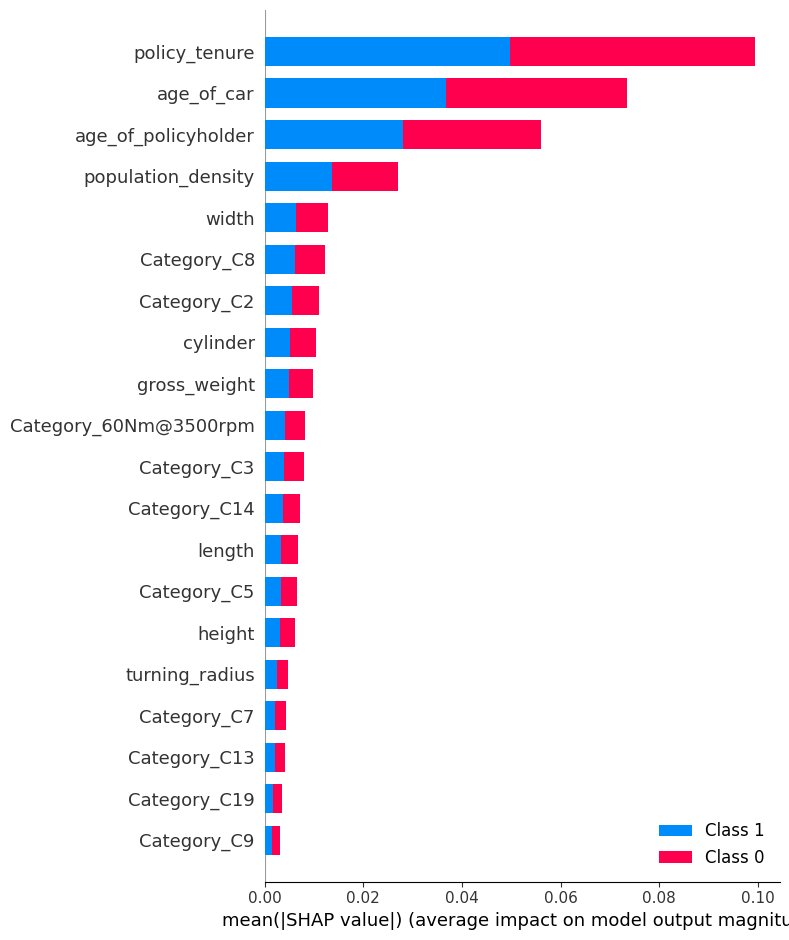

In [188]:
# train = pd.read_csv('tidy_train.csv') # load處理完的data
# train.drop(columns=['Unnamed: 0'], inplace = True)

# X = train.drop(columns=['is_claim'])
# y = train.is_claim

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
import shap

# 創建一個決策樹分類器
tree_package = DecisionTreeClassifier()
tree_package.fit(ori_X_train, ori_y_train)
tree_explainer = shap.TreeExplainer(tree_package).shap_values(ori_X_test)

# 顯示 SHAP 摘要圖
shap.summary_plot(tree_explainer, ori_X_test)

 It is known that sometimes the original feature set may not be effective. Designing new features based on the original set is crucial for model performance. Based on your observations and experience, propose an algorithm that can derive new features to enhance model accuracy.

In [242]:
# 將線性分類器中認為較好的特徵拿出來進行PCA
new_feature = train[:,np.where(np.abs(linearclass.weights) > 1.5)[0]]
new_test = test[:,np.where(np.abs(linearclass.weights) > 1.5)[0]]

# 計算共變異數矩陣
covariance_matrix_train = np.cov(new_feature, rowvar=False)
covariance_matrix_test = np.cov(new_test, rowvar=False)

# 進行特徵值分解
eigenvalues_train, eigenvectors_train = np.linalg.eigh(covariance_matrix_train)
eigenvalues_test, eigenvectors_test = np.linalg.eigh(covariance_matrix_test)

# 對特徵向量按照特徵數值大小做排序
sorted_indices_train = np.argsort(eigenvalues_train)[::-1]
eigenvectors_sorted_train = eigenvectors_train[:, sorted_indices_train]
sorted_indices_test = np.argsort(eigenvalues_test)[::-1]
eigenvectors_sorted_test = eigenvectors_test[:, sorted_indices_test]

# 選擇我們要保留的主成份（這裡選擇前兩個主成份）
num_components = 2
principal_components_train = eigenvectors_sorted_train[:, :num_components]
principal_components_test = eigenvectors_sorted_test[:, :num_components]

# 投影到主成分上
data_pca = np.dot(new_feature, principal_components_train)
test_pca = np.dot(new_test, principal_components_test)

In [250]:


linearclassPCA = LinearClassifier(learning_rate=1e-4)
rd.seed(10)
# 輸入訓練資料進行訓練
linearclassPCA.fit(data_pca, train_label)

# 利用切好的test資料進行預測
predictions = [linearclassPCA.predict(x) for x in test_pca]

print(f"accuracy percentage:{round(accuracy_score(predictions, test_label) * 100, 4)}%")
print(collections.Counter(test_label))
print(collections.Counter(predictions))

  0%|          | 0/46873 [00:00<?, ?it/s]

100%|██████████| 46873/46873 [00:00<00:00, 301071.38it/s]

accuracy percentage:93.6513%
Counter({0: 10975, 1: 744})
Counter({0: 11719})


# Cross-Validation:
Based on Problem 1, use k-fold cross-validation to verify the stability of each classifier. Note that cross-validation could adopt any existing package. Answer the questions below:

### 1. set k=3,5,10, and make some discussions of your observation.

##### linear classifier

In [251]:
from sklearn.model_selection import cross_val_score
from sklearn. model_selection import KFold

def Average(lst): 
    return sum(lst) / len(lst) 

linearclass = LinearClassifier(learning_rate=1e-3)
kf = KFold (n_splits=3) # K = 3
print("K=3")
K3PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    linearclass.fit(X_train, y_train)
    predictions = [linearclass.predict(x) for x in X_val]
    K3PA.append(round(accuracy_score(predictions, y_val) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K3PA)}")

kf = KFold (n_splits=5) # K = 5
print("K=5")
K5PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    linearclass.fit(X_train, y_train)
    predictions = [linearclass.predict(x) for x in X_val]
    K5PA.append(round(accuracy_score(predictions, y_val) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K5PA)}")

kf = KFold (n_splits=10) # K = 10
print("K=10")
K10PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    linearclass.fit(X_train, y_train)
    predictions = [linearclass.predict(x) for x in X_val]
    K10PA.append(round(accuracy_score(predictions, y_val) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K10PA)}")


K=3


100%|██████████| 31248/31248 [00:00<00:00, 36693.20it/s]


validation accuracy:85.2032%


100%|██████████| 31249/31249 [00:00<00:00, 36410.26it/s]


validation accuracy:89.4329%


100%|██████████| 31249/31249 [00:00<00:00, 36389.82it/s]


validation accuracy:89.1193%
Mean Prediction accuracy:87.91846666666667
K=5


100%|██████████| 37498/37498 [00:00<00:00, 37700.00it/s]


validation accuracy:89.376%


100%|██████████| 37498/37498 [00:01<00:00, 37364.34it/s]


validation accuracy:90.304%


100%|██████████| 37498/37498 [00:01<00:00, 36359.90it/s]


validation accuracy:89.0453%


100%|██████████| 37499/37499 [00:01<00:00, 36491.48it/s]


validation accuracy:90.3456%


100%|██████████| 37499/37499 [00:01<00:00, 36360.72it/s]


validation accuracy:91.8071%
Mean Prediction accuracy:90.1756
K=10


100%|██████████| 42185/42185 [00:01<00:00, 36637.81it/s]


validation accuracy:91.1903%


100%|██████████| 42185/42185 [00:01<00:00, 36048.13it/s]


validation accuracy:88.5879%


100%|██████████| 42185/42185 [00:01<00:00, 34952.92it/s]


validation accuracy:89.5051%


100%|██████████| 42186/42186 [00:01<00:00, 36116.82it/s]


validation accuracy:91.039%


100%|██████████| 42186/42186 [00:01<00:00, 36244.35it/s]


validation accuracy:86.8146%


100%|██████████| 42186/42186 [00:01<00:00, 36228.26it/s]


validation accuracy:91.5938%


100%|██████████| 42186/42186 [00:01<00:00, 35108.08it/s]


validation accuracy:90.975%


100%|██████████| 42186/42186 [00:01<00:00, 33521.74it/s]


validation accuracy:87.2413%


100%|██████████| 42186/42186 [00:01<00:00, 36746.68it/s]


validation accuracy:91.1244%


100%|██████████| 42186/42186 [00:01<00:00, 35018.66it/s]

validation accuracy:82.6115%
Mean Prediction accuracy:89.06829


##### K-NN Classifier

In [254]:
knn = KNNClassifier(k=3)
kf = KFold (n_splits=3) # K = 3
print("K=3")
K3PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    knn.fit(X_train[0:500], y_train[0:500])
    predictions = knn.predict(X_val, mode = 2)
    K3PA.append(round(accuracy_score(predictions, y_val) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K3PA)}")

kf = KFold (n_splits=5) # K = 5
print("K=5")
K5PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    knn.fit(X_train[0:500], y_train[0:500])
    predictions = knn.predict(X_val, mode = 2)
    K5PA.append(round(accuracy_score(predictions, y_val) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K5PA)}")

kf = KFold (n_splits=10) # K = 10
print("K=10")
K10PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    knn.fit(X_train[0:500], y_train[0:500])
    predictions = knn.predict(X_val, mode = 2)    
    K10PA.append(round(accuracy_score(predictions, y_val) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K10PA)}")

K=3


Processing List:   0%|          | 0/15625 [00:00<?, ?x/s]

Processing List: 100%|██████████| 15625/15625 [00:01<00:00, 9266.66x/s]


validation accuracy:92.8064%


Processing List: 100%|██████████| 15624/15624 [00:01<00:00, 9499.46x/s]


validation accuracy:93.2988%


Processing List: 100%|██████████| 15624/15624 [00:01<00:00, 9604.45x/s]


validation accuracy:93.2732%
Mean Prediction accuracy:93.12613333333333
K=5


Processing List: 100%|██████████| 9375/9375 [00:01<00:00, 9318.51x/s]


validation accuracy:92.64%


Processing List: 100%|██████████| 9375/9375 [00:01<00:00, 9200.42x/s]


validation accuracy:93.3653%


Processing List: 100%|██████████| 9375/9375 [00:01<00:00, 8697.45x/s]


validation accuracy:93.568%


Processing List: 100%|██████████| 9374/9374 [00:01<00:00, 9118.93x/s]


validation accuracy:93.0339%


Processing List: 100%|██████████| 9374/9374 [00:01<00:00, 7886.91x/s]


validation accuracy:93.45%
Mean Prediction accuracy:93.21144000000001
K=10


Processing List: 100%|██████████| 4688/4688 [00:00<00:00, 8751.54x/s]


validation accuracy:93.7287%


Processing List: 100%|██████████| 4688/4688 [00:00<00:00, 10234.20x/s]


validation accuracy:93.43%


Processing List: 100%|██████████| 4688/4688 [00:00<00:00, 9056.82x/s]


validation accuracy:93.7927%


Processing List: 100%|██████████| 4687/4687 [00:00<00:00, 10236.78x/s]


validation accuracy:92.9379%


Processing List: 100%|██████████| 4687/4687 [00:00<00:00, 8635.01x/s]


validation accuracy:93.45%


Processing List: 100%|██████████| 4687/4687 [00:00<00:00, 8895.86x/s]


validation accuracy:93.6847%


Processing List: 100%|██████████| 4687/4687 [00:00<00:00, 9209.50x/s]


validation accuracy:93.1086%


Processing List: 100%|██████████| 4687/4687 [00:00<00:00, 9116.72x/s]


validation accuracy:92.9592%


Processing List: 100%|██████████| 4687/4687 [00:00<00:00, 9071.71x/s]


validation accuracy:93.45%


Processing List: 100%|██████████| 4687/4687 [00:00<00:00, 10231.02x/s]

validation accuracy:93.45%
Mean Prediction accuracy:93.39918000000002


##### Naïve Decision Tree Classifier

In [261]:
classifier = DecisionTreeClassifier(min_samples_split=50) # 沒有設定深度（No預剪枝）
kf = KFold (n_splits=3) # K = 3
print("K=3")
K3PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    classifier.fit(X_train[:2000],y_train[:2000].reshape(-1,1))
    predictions = classifier.predict(X_val[:1000])
    K3PA.append(round(accuracy_score(predictions, y_val[:1000]) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val[:1000]) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K3PA)}")

kf = KFold (n_splits=5) # K = 5
print("K=5")
K5PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    classifier.fit(X_train[:2000],y_train[:2000].reshape(-1,1))
    predictions = classifier.predict(X_val[:1000])
    K5PA.append(round(accuracy_score(predictions, y_val[:1000]) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val[:1000]) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K5PA)}")

kf = KFold (n_splits=10) # K = 10
print("K=10")
K10PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    classifier.fit(X_train[:2000],y_train[:2000].reshape(-1,1))
    predictions = classifier.predict(X_val[:1000]) 
    K10PA.append(round(accuracy_score(predictions, y_val[:1000]) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val[:1000]) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K10PA)}")

K=3
validation accuracy:92.3%
validation accuracy:93.6%
validation accuracy:92.6%
Mean Prediction accuracy:92.83333333333333
K=5
validation accuracy:95.3%
validation accuracy:92.8%
validation accuracy:94.5%
validation accuracy:93.6%
validation accuracy:94.1%
Mean Prediction accuracy:94.06000000000002
K=10
validation accuracy:94.9%
validation accuracy:93.3%
validation accuracy:92.8%
validation accuracy:94.4%
validation accuracy:94.5%
validation accuracy:93.5%
validation accuracy:93.6%
validation accuracy:93.3%
validation accuracy:94.1%
validation accuracy:93.4%
Mean Prediction accuracy:93.78


##### Decision Tree with Pruning

In [262]:
classifier = DecisionTreeClassifier(min_samples_split=50, max_depth=20) # 有設定深度（預剪枝）
kf = KFold (n_splits=3) # K = 3
print("K=3")
K3PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    classifier.fit(X_train[:2000],y_train[:2000].reshape(-1,1))
    predictions = classifier.predict(X_val[2000:3000]) 
    K3PA.append(round(accuracy_score(predictions, y_val[2000:3000]) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val[:1000]) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K3PA)}")

kf = KFold (n_splits=5) # K = 5
print("K=5")
K5PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    classifier.fit(X_train[:2000],y_train[:2000].reshape(-1,1))
    predictions = classifier.predict(X_val[2000:3000]) 
    K3PA.append(round(accuracy_score(predictions, y_val[2000:3000]) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val[:1000]) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K3PA)}")

kf = KFold (n_splits=10) # K = 10
print("K=10")
K10PA = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    classifier.fit(X_train[:2000],y_train[:2000].reshape(-1,1))
    predictions = classifier.predict(X_val[2000:3000]) 
    K3PA.append(round(accuracy_score(predictions, y_val[2000:3000]) * 100, 4))
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val[:1000]) * 100, 4)}%")
print(f"Mean Prediction accuracy:{Average(K3PA)}")

K=3
validation accuracy:94.7%
validation accuracy:92.1%
validation accuracy:91.7%
Mean Prediction accuracy:92.89999999999999
K=5
validation accuracy:94.3%
validation accuracy:91.3%
validation accuracy:93.5%
validation accuracy:92.5%
validation accuracy:92.4%
Mean Prediction accuracy:92.53750000000001
K=10
validation accuracy:92.8%
validation accuracy:91.7%
validation accuracy:91.3%
validation accuracy:93.5%
validation accuracy:93.5%
validation accuracy:92.4%
validation accuracy:92.5%
validation accuracy:91.6%
validation accuracy:92.4%
validation accuracy:92.2%
Mean Prediction accuracy:92.3722222222222


### 2. Please design an algorithm that can merge/aggregate the predicted results from k classifiers in k-fold cross-validation. Compare the performance and complexity of the crossvalidation with Problem 1. 

In [160]:
linearclass = LinearClassifier(learning_rate=1e-3)

kf = KFold (n_splits=5) # K = 5
print("K=5")
k5res = []
for train_index, val_index in kf.split(train):
    X_train, X_val = train[train_index], train[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]
    linearclass.fit(X_train, y_train)
    predictions = [linearclass.predict(x) for x in X_val]
    k5res.append([linearclass.predict(x) for x in test])
    print(f"validation accuracy:{round(accuracy_score(predictions, y_val) * 100, 4)}%")


K=5


100%|██████████| 37498/37498 [00:01<00:00, 28156.96it/s]


validation accuracy:88.9813%


100%|██████████| 37498/37498 [00:01<00:00, 28814.03it/s]


validation accuracy:89.3973%


100%|██████████| 37498/37498 [00:01<00:00, 29026.90it/s]


validation accuracy:89.2693%


100%|██████████| 37499/37499 [00:01<00:00, 29063.88it/s]


validation accuracy:88.3721%


100%|██████████| 37499/37499 [00:01<00:00, 28625.47it/s]


validation accuracy:87.9881%


In [161]:
def col_mode(col):
    values, counts = np.unique(col, return_counts=True)
    return values[np.argmax(counts)]

# 使用 apply_along_axis 計算每一行眾數
k5res_modes = np.apply_along_axis(col_mode, axis=0, arr=k5res)
print(f"merge accuracy:{round(accuracy_score(k5res_modes, test_label) * 100, 4)}%")


linearclass = LinearClassifier(learning_rate=1e-3)
# 輸入訓練資料進行訓練
linearclass.fit(train, train_label)
# 利用切好的test資料進行預測
predictions = [linearclass.predict(x) for x in test]
print(f"accuracy percentage:{round(accuracy_score(predictions, test_label) * 100, 4)}%")

merge accuracy:92.8066%


100%|██████████| 46873/46873 [00:01<00:00, 29183.36it/s]

accuracy percentage:91.5266%


### 3. How do we know the performance of one model is really better than another one? Please compare the result in 5-fold cross-validation and the result of Problem 1 to justify which is “REALLY” better. Also show me why.

利用前面5-fold的結果進行比較